**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division

import pylab as pl
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='DejaVu Sans', font_scale=1.2, rc=None)
%pylab inline

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [3]:
x = np.linspace(5, 100, 10)
a = 0.7
y = line(a, x, 0, errors)

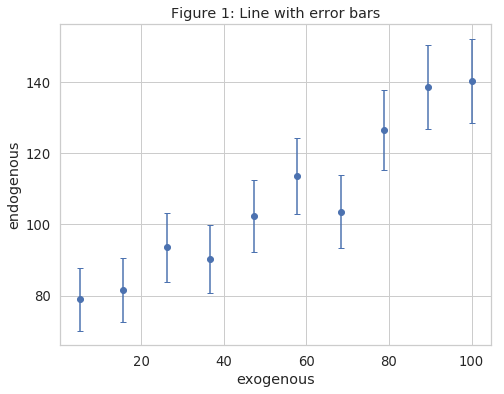

In [25]:
fig = pl.figure(figsize=(17,13))
ax = fig.add_subplot(221)

ax.scatter(x, y)
ax.errorbar(x, y, yerr=errors(y), fmt='.', capsize=3)

ax.set_title('Figure 1: Line with error bars')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

pl.show()

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
print(y)

[ 1.85963645 15.38544515 23.01167653 22.91822165 39.44123819 51.77330813
 45.86246393 58.65874968 64.17246058 51.61486853]


In [6]:
print(x)

[  5.          15.55555556  26.11111111  36.66666667  47.22222222
  57.77777778  68.33333333  78.88888889  89.44444444 100.        ]


In [7]:
print(sm.add_constant(x))

[[  1.           5.        ]
 [  1.          15.55555556]
 [  1.          26.11111111]
 [  1.          36.66666667]
 [  1.          47.22222222]
 [  1.          57.77777778]
 [  1.          68.33333333]
 [  1.          78.88888889]
 [  1.          89.44444444]
 [  1.         100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [8]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     272.6
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.89e-08
Time:                        00:24:27   Log-Likelihood:                -34.411
No. Observations:                  10   AIC:                             70.82
Df Residuals:                       9   BIC:                             71.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6858      0.042     16.511      0.000       0.592       0.780
==============================================================================
Omnibus:                        7.974   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.078
Skew:                          -1.190   Prob(JB):                        0.215
Kurtosis:                       4.312   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#THE RIGHT WAY
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     54.98
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.51e-05
Time:                        00:24:28   Log-Likelihood:                -33.596
No. Observations:                  10   AIC:                             71.19
Df Residuals:                       8   BIC:                             71.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8581      4.923      1.190      0.268      -5.494      17.211
x1             0.6021      0.081      7.415      0.000       0.415       0.789
==============================================================================
Omnibus:                        1.133   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                0.475
Skew:                          -0.515   Prob(JB):                        0.789
Kurtosis:                       2.719   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

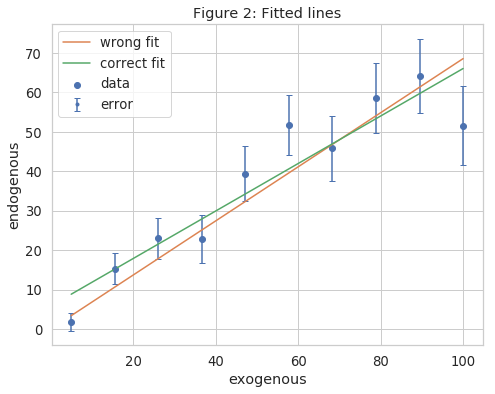

In [10]:
fig = pl.figure(figsize=(17,13))
ax = fig.add_subplot(221)

ax.scatter(x, y, label='data')
ax.errorbar(x, y, yerr=errors(x), fmt='.', capsize=3, label='error')

ax.plot(x, smfit_wrong.predict(x), label='wrong fit')
ax.plot(x, smfit.predict(sm.add_constant(x)), label='correct fit')

ax.legend()

ax.set_title('Figure 2: Fitted lines')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

pl.show()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [11]:
x = np.linspace(5, 100, 10)
a = 0.7
y = line(a, x, 100*a, errors)

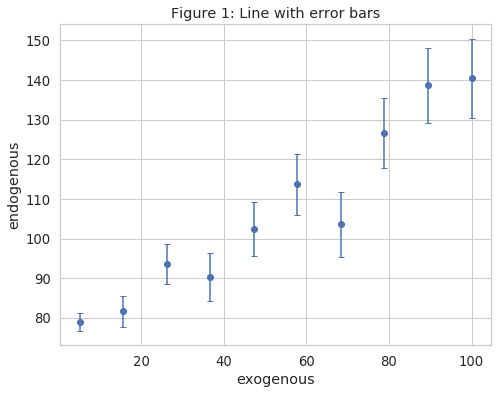

In [12]:
fig = pl.figure(figsize=(17,13))
ax = fig.add_subplot(221)

ax.scatter(x, y)
ax.errorbar(x, y, yerr=errors(x), fmt='.', capsize=3)

ax.set_title('Figure 1: Line with error bars')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

pl.show()

# 6. repeat step 3

In [13]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     72.01
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.38e-05
Time:                        00:24:37   Log-Likelihood:                -50.120
No. Observations:                  10   AIC:                             102.2
Df Residuals:                       9   BIC:                             102.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6958      0.200      8.486      0.000       1.244       2.148
==============================================================================
Omnibus:                        1.102   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.678
Skew:                           0.162   Prob(JB):                        0.713
Kurtosis:                       1.767   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#THE RIGHT WAY
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     99.68
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           8.59e-06
Time:                        00:24:38   Log-Likelihood:                -31.702
No. Observations:                  10   AIC:                             67.40
Df Residuals:                       8   BIC:                             68.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.7575      4.074     17.616      0.000      62.364      81.151
x1             0.6708      0.067      9.984      0.000       0.516       0.826
==============================================================================
Omnibus:                        7.526   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                3.094
Skew:                          -1.288   Prob(JB):                        0.213
Kurtosis:                       3.887   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

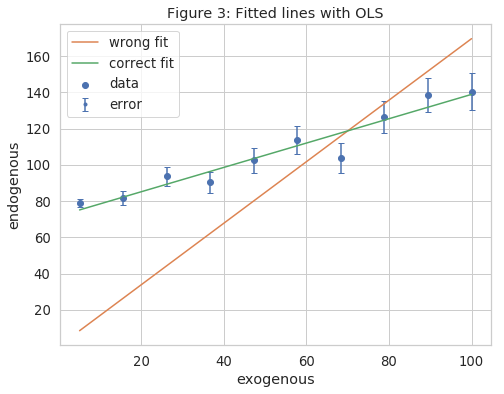

In [15]:
#Plotting

fig = pl.figure(figsize=(17,13))
ax = fig.add_subplot(221)

ax.scatter(x, y, label='data')
ax.errorbar(x, y, yerr=errors(x), fmt='.', capsize=3, label='error')

ax.plot(x, smfit_wrong.predict(x), label='wrong fit')
ax.plot(x, smfit.predict(sm.add_constant(x)), label='correct fit')

ax.legend()

ax.set_title('Figure 3: Fitted lines with OLS')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

pl.show()

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [22]:
#Weights
weights = [1/errors(i) for i in y]
weights

[0.11251846040041684,
 0.11066267250887515,
 0.10339028306115909,
 0.10526654708018021,
 0.0988116712278065,
 0.09379933649616029,
 0.0982500666542538,
 0.08889385972723182,
 0.08491184810491141,
 0.08439137588851019]

In [23]:
#WLS fitting
smfit_WLS = smf.WLS(y, sm.add_constant(x), weights).fit()
smfit_WLS.summary()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.924
Model:                            WLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     96.89
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           9.55e-06
Time:                        00:32:09   Log-Likelihood:                -31.695
No. Observations:                  10   AIC:                             67.39
Df Residuals:                       8   BIC:                             67.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.0591      3.909     18.435      0.000      63.045      81.073
x1             0.6623      0.067      9.843      0.000       0.507       0.817
==============================================================================
Omnibus:                        7.034   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                2.904
Skew:                          -1.266   Prob(JB):                        0.234
Kurtosis:                       3.750   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

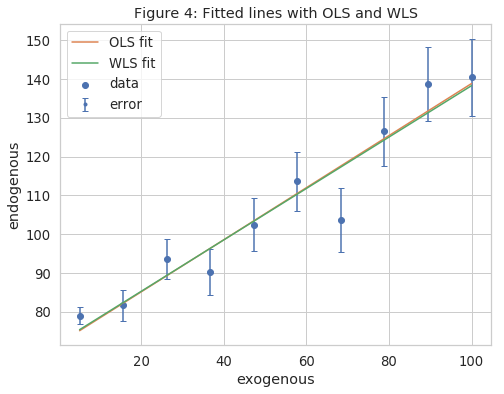

In [24]:
#Plotting

fig = pl.figure(figsize=(17,13))
ax = fig.add_subplot(221)

ax.scatter(x, y, label='data')
ax.errorbar(x, y, yerr=errors(x), fmt='.', capsize=3, label='error')

ax.plot(x, smfit.predict(sm.add_constant(x)), label='OLS fit')
ax.plot(x, smfit_WLS.predict(sm.add_constant(x)), label='WLS fit')

ax.legend()

ax.set_title('Figure 4: Fitted lines with OLS and WLS')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

pl.show()

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

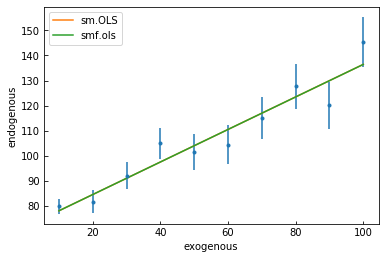

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();